<a href="https://colab.research.google.com/github/midhunkrishnam/Machine-Learning-Algoritnms/blob/main/salaryPolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
df=pd.read_csv("/content/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
print(df.columns)

Index(['Position', 'Level', 'Salary'], dtype='object')


In [ ]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [ ]:
x=df.iloc[:,1:-1].values
x
y=df.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

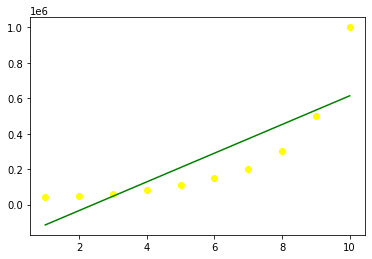

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color="yellow")
plt.plot(x,y_pred,color="green")
plt.show()

In [ ]:
#mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
per=mean_absolute_percentage_error(y,y_pred)
per

0.9673763085399448

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [ ]:
poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)
y_poly=lin2.predict(x_poly)
y_poly

array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
        83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846154])

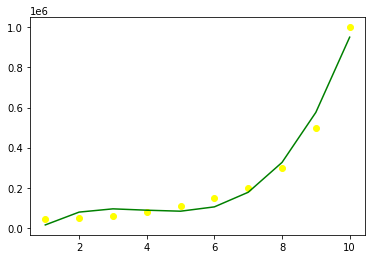

In [ ]:
plt.scatter(x,y,color="yellow")
plt.plot(x,y_poly,color="green")

In [ ]:
df1=pd.DataFrame({"actual_value":y,"polynomial":y_poly})
df1

,actual_value,polynomial
0,45000,14902.097902
1,50000,78759.906760
2,60000,94960.372960
3,80000,88223.776224
4,110000,83270.396270
5,150000,104820.512821
6,200000,177594.405594
7,300000,326312.354312
8,500000,575694.638695
9,1000000,950461.538462


In [ ]:
#PerFormance Evaluations
from sklearn.metrics import mean_absolute_error
per=mean_absolute_error(y,y_poly)
per

34790.20979020849

In [ ]:
#mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
per=mean_absolute_percentage_error(y,y_poly)
per

0.2874367026912109

In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
s=mean_squared_error(y,y_poly)
s

1515662004.662004

In [ ]:
#root_mean_square
root_square=np.sqrt(s)
root_square

38931.50401232919

In [ ]:
#r2 score polynomial
from sklearn.metrics import r2_score
score=r2_score(y,y_poly)
score

0.9812097727913367